[1] -200 -198 -196 -194 -192 -190 -188 -186 -184 -182 -180 -178 -176 -174 -172
 [16] -170 -168 -166 -164 -162 -160 -158 -156 -154 -152 -150 -148 -146 -144 -142
 [31] -140 -138 -136 -134 -132 -130 -128 -126 -124 -122 -120 -118 -116 -114 -112
 [46] -110 -108 -106 -104 -102 -100  -98  -96  -94  -92  -90  -88  -86  -84  -82
 [61]  -80  -78  -76  -74  -72  -70  -68  -66  -64  -62  -60  -58  -56  -54  -52
 [76]  -50  -48  -46  -44  -42  -40  -38  -36  -34  -32  -30  -28  -26  -24  -22
 [91]  -20  -18  -16  -14  -12  -10   -8   -6   -4   -2    0

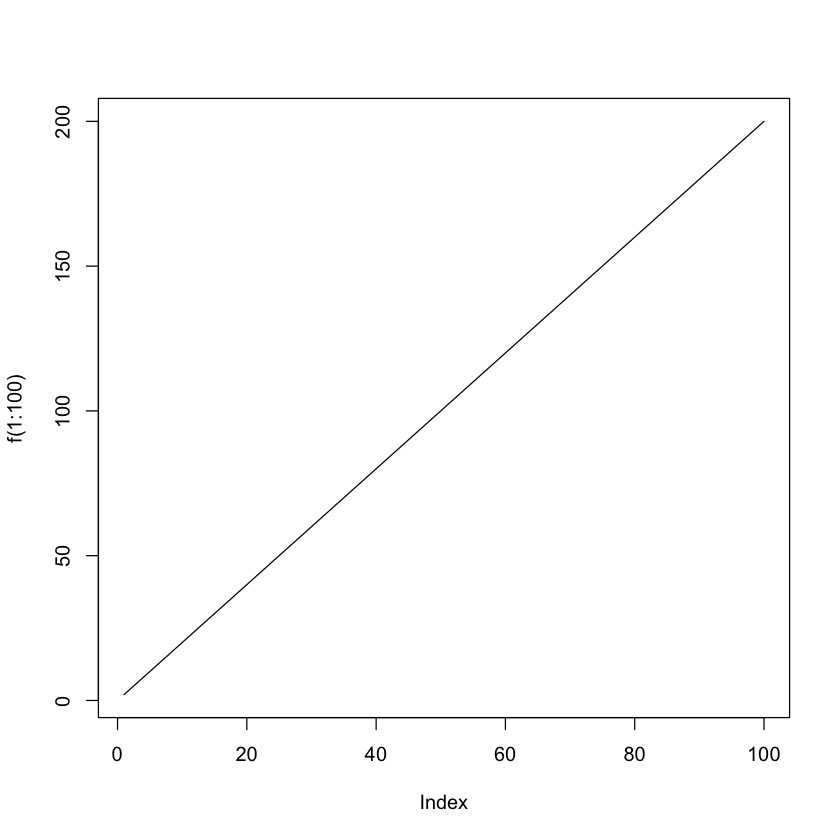

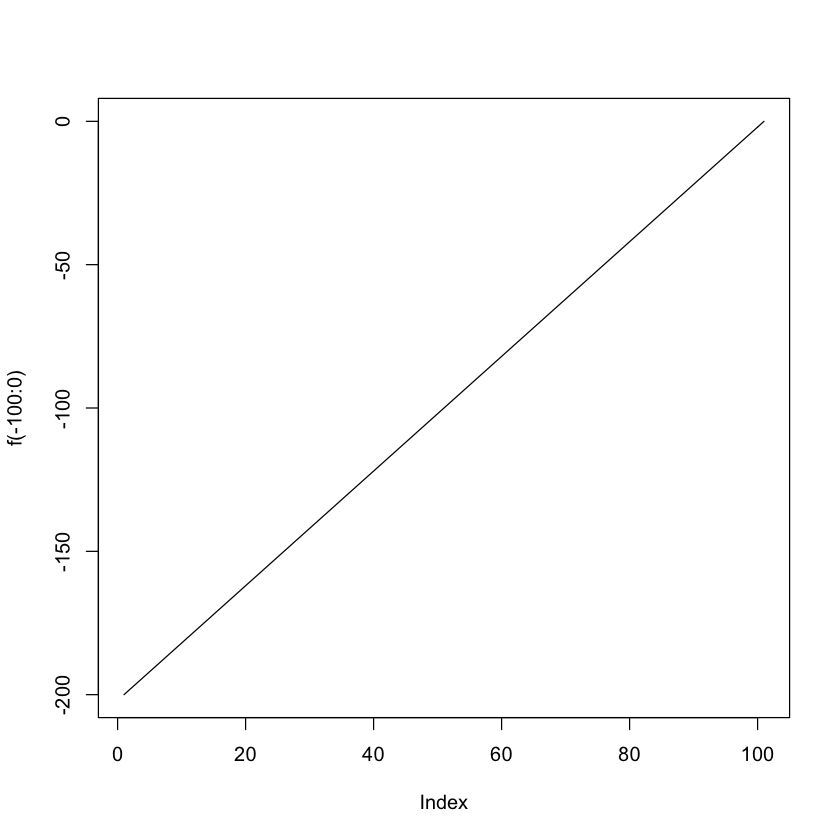

In [6]:
f = function(x) { 1 + 3*x - (x + 1)}
plot(f(1:100), type='l')
f(-100:0)
plot(f(-100:0), type='l')